# Suite2p Segmentation

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import suite2p
import lbm_suite2p_python as lsp

In [2]:
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': True,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

C:\Users\RBO\AppData\Local\Temp\ipykernel_1956\1385736914.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mpl.cm.get_cmap('jet')


In [10]:
parent_path = Path(r"E://datasets/single_hemisphere/zplanes")
save_path0 = Path().home() / 'lbm_data' / 'python'
files = [x for x in parent_path.glob('*.tif*')]
files[13]

WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_21.tiff')

In [11]:
save_path = parent_path / 'results'
db = {
    'data_path': [str(parent_path)],
    'save_path0': str(save_path),
    'tiff_list': [files[0], files[1], files[13]],
}
db

{'data_path': ['E:\\datasets\\single_hemisphere\\zplanes'],
 'save_path0': 'E:\\datasets\\single_hemisphere\\zplanes\\results',
 'tiff_list': [WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_1.tiff'),
  WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_10.tiff'),
  WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_21.tiff')]}

In [12]:
ops = suite2p.default_ops()
metadata = lsp.get_metadata(files[0])
new_ops = lsp.ops_from_metadata(ops, metadata)

In [13]:
output_ops = suite2p.run_s2p(ops=ops, db=db)

{'data_path': ['E:\\datasets\\single_hemisphere\\zplanes'], 'save_path0': 'E:\\datasets\\single_hemisphere\\zplanes\\results', 'tiff_list': [WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_1.tiff'), WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_10.tiff'), WindowsPath('E:/datasets/single_hemisphere/zplanes/plane_21.tiff')]}
tif
** Found 3 tifs - converting to binary **
2000 frames of binary, time 6.58 sec.
4000 frames of binary, time 12.70 sec.
6000 frames of binary, time 16.94 sec.
8000 frames of binary, time 21.38 sec.
time 84.41 sec. Wrote 25320 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\RBO\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 14.32 sec.
Registered 500/25320 in 15.62s
Registered 1000/25320 in 30.17s
Registered 1500/25320 in 44.79s
Regist

c:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\suite2p\detection\sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 4.22, threshold 21.10 
0 ROIs, score=136.67
1000 ROIs, score=43.97
2000 ROIs, score=33.77
3000 ROIs, score=27.67
4000 ROIs, score=23.73
Detected 4944 ROIs, 173.71 sec
After removing overlaps, 4589 ROIs remain
----------- Total 212.75 sec.
----------- EXTRACTION
Masks created, 5.51 sec.


c:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 4589 ROIs in 25320 frames, 72.42 sec.
----------- Total 79.59 sec.
----------- CLASSIFICATION
['npix_norm', 'compact', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 2.73 sec.
Plane 0 processed in 1100.44 sec (can open in GUI).
total = 1186.37 sec.
TOTAL RUNTIME 1186.37 sec


In [14]:
len(output_ops)

132

In [126]:
print(set(output_ops.keys()).difference(ops.keys()))

{'Lx', 'rmax', 'Lyc', 'meanImg', 'refImg', 'Ly', 'timing', 'input_format', 'meanImgE', 'xoff', 'Vsplit', 'max_proj', 'filelist', 'Vmax', 'date_proc', 'nframes', 'Lxc', 'data_path', 'corrXY1', 'yoff', 'xoff1', 'regDX', 'Vmap', 'corrXY', 'ops_path', 'yrange', 'save_path', 'tPC', 'ihop', 'regPC', 'first_tiffs', 'rmin', 'frames_per_folder', 'xrange', 'tiff_list', 'reg_file', 'badframes', 'spatscale_pix', 'Vcorr', 'frames_per_file', 'yoff1'}


In [127]:
list(Path(output_ops['save_path']).iterdir())

[PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/spks.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/Fneu.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/iscell.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/data.bin'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/stat.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/F.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/ops.npy')]

In [15]:
output_op_file = np.load(Path(output_ops['save_path']).joinpath('ops.npy'), allow_pickle=True).item()
output_op_file.keys() == output_ops.keys()

True

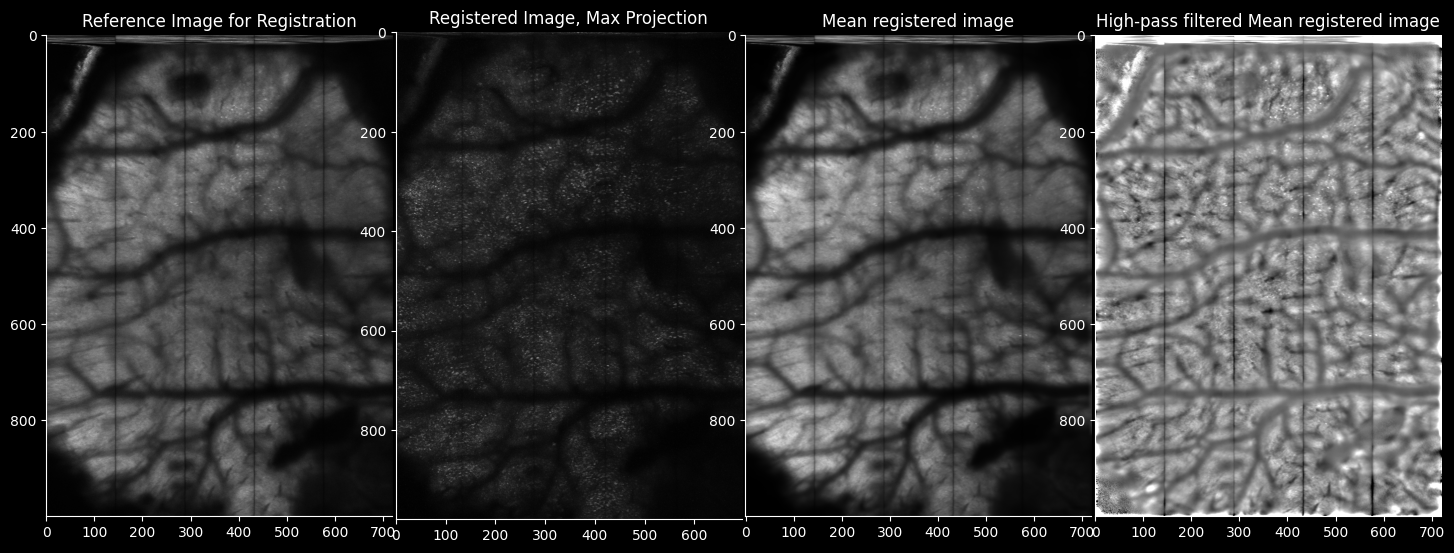

In [16]:
plt.subplot(1, 4, 1)
plt.imshow(output_ops['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(1, 4, 2)
plt.imshow(output_ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(1, 4, 3)
plt.imshow(output_ops['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(1, 4, 4)
plt.imshow(output_ops['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

In [17]:
stats_file = Path(output_ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(output_ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape

((4589,), (4589,))

C:\Users\RBO\AppData\Local\Temp\ipykernel_1956\2986013853.py:9: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im, axis=0), cmap='jet')
C:\Users\RBO\AppData\Local\Temp\ipykernel_1956\2986013853.py:13: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
C:\Users\RBO\AppData\Local\Temp\ipykernel_1956\2986013853.py:17: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')


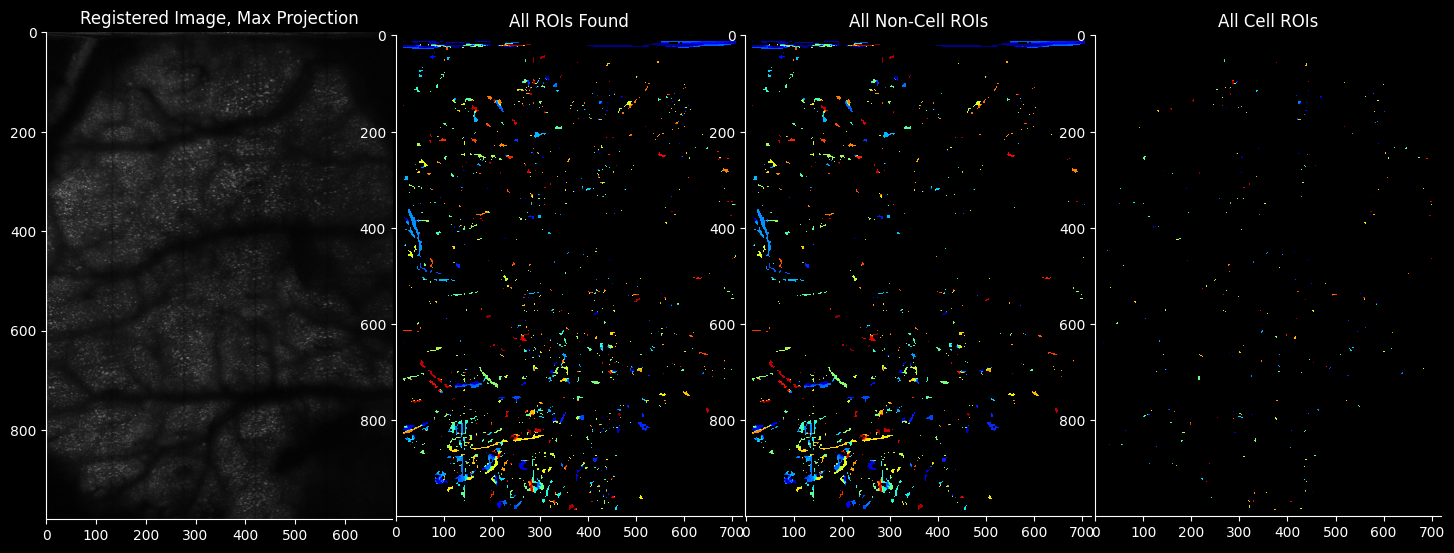

In [18]:
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=output_ops['Ly'], Lx=output_ops['Lx'], label_id=True)
im[im == 0] = np.nan

plt.subplot(1, 4, 1)
plt.imshow(output_ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection")

plt.subplot(1, 4, 2)
plt.imshow(np.nanmax(im, axis=0), cmap='jet')
plt.title("All ROIs Found")

plt.subplot(1, 4, 3)
plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
plt.title("All Non-Cell ROIs")

plt.subplot(1, 4, 4)
plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");

In [19]:
f_cells = np.load(Path(output_ops['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(output_ops['save_path']).joinpath('Fneu.npy'))
spks = np.load(Path(output_ops['save_path']).joinpath('spks.npy'))
f_cells.shape, f_neuropils.shape, spks.shape

((4589, 25320), (4589, 25320), (4589, 25320))

In [22]:
len(iscell)

4589

In [23]:
im[iscell].shape

(741, 1000, 720)

In [ ]:
plt.figure(figsize=[20,20])
plt.suptitle("Flourescence and Deconvolved Traces for Different ROIs", y=0.92);
rois = np.arange(len(f_cells))[::20]
for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi]
    f_neu = f_neuropils[roi]
    sp = spks[roi]
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin
    sp /= sp.max()
    sp *= frange
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
    plt.plot(sp + fmin, label="Deconvolved")
    plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
    plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))